In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [2]:
root = r'C:\Users\DELL\Desktop\IAQF 2021\data'
dataset = pd.read_csv(root + '/gas_spot_futures.csv')#,index_col = 'Date', parse_dates = True)
dataset

,Date,gasoline,crude_oil,Open,High,Low,Close,Adj Close,Volume
0,8/28/00,1.521,32.869999,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
1,9/4/00,1.568,32.869999,NaN,NaN,NaN,NaN,NaN,NaN
2,9/11/00,1.598,35.099998,33.799999,35.849998,33.750000,35.099998,35.099998,101518.0
3,9/18/00,1.599,36.880001,36.200001,37.150002,36.150002,36.880001,36.880001,59663.0
4,9/25/00,1.586,31.570000,31.400000,32.099998,31.049999,31.570000,31.570000,104683.0
...,...,...,...,...,...,...,...,...,...
996,12/21/20,2.311,47.740002,48.540001,48.610001,46.180000,47.740002,47.740002,478098.0
997,12/28/20,2.330,47.619999,48.230000,48.959999,47.500000,47.619999,47.619999,238462.0
998,1/4/21,2.336,47.619999,48.400002,49.830002,47.180000,47.619999,47.619999,528525.0
999,1/11/21,2.403,52.250000,52.580002,52.700001,51.500000,52.250000,52.250000,394822.0


In [3]:
dataset['log_gasoline'] = np.log(dataset['gasoline'])
dataset['log_crude_oil'] = np.log(dataset['crude_oil'])
log_df = dataset[['Date','log_gasoline','log_crude_oil']]

C:\Users\DELL\anaconda3_1\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


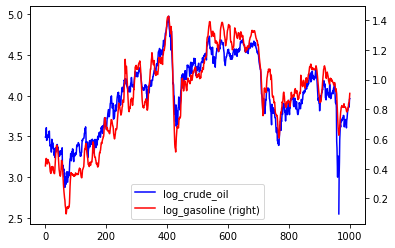

In [4]:
fig, axes = plt.subplots()
log_df["log_crude_oil"].plot(ax = axes, style = 'b-', legend='log crude futures')
log_df['log_gasoline'].plot(ax = axes, style = 'r-',legend = 'log gasoline price', secondary_y = True)

In [5]:
dataset1 = pd.read_csv(root + '/gas_spot_futures.csv',index_col = 'Date', parse_dates = True)
df = dataset1.loc[:,'gasoline':'crude_oil']
df

,gasoline,crude_oil
Date,,
2000-08-28,1.521,32.869999
2000-09-04,1.568,32.869999
2000-09-11,1.598,35.099998
2000-09-18,1.599,36.880001
2000-09-25,1.586,31.570000
...,...,...
2020-12-21,2.311,47.740002
2020-12-28,2.330,47.619999
2021-01-04,2.336,47.619999


In [6]:
from statsmodels.tsa.stattools import grangercausalitytests
res = grangercausalitytests(df[['gasoline', 'crude_oil']], maxlag=15)
res


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=57.7199 , p=0.0000  , df_denom=997, df_num=1
ssr based chi2 test:   chi2=57.8935 , p=0.0000  , df=1
likelihood ratio test: chi2=56.2797 , p=0.0000  , df=1
parameter F test:         F=57.7199 , p=0.0000  , df_denom=997, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=47.6009 , p=0.0000  , df_denom=994, df_num=2
ssr based chi2 test:   chi2=95.6806 , p=0.0000  , df=2
likelihood ratio test: chi2=91.3717 , p=0.0000  , df=2
parameter F test:         F=47.6009 , p=0.0000  , df_denom=994, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=38.1912 , p=0.0000  , df_denom=991, df_num=3
ssr based chi2 test:   chi2=115.3830, p=0.0000  , df=3
likelihood ratio test: chi2=109.1863, p=0.0000  , df=3
parameter F test:         F=38.1912 , p=0.0000  , df_denom=991, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=29.9786 , p=0.0000  

{1: ({'ssr_ftest': (57.71985941660742, 6.948003235354825e-14, 997.0, 1),
   'ssr_chi2test': (57.893540036717575, 2.7669429463588922e-14, 1),
   'lrtest': (56.27970458937307, 6.286094409604928e-14, 1),
   'params_ftest': (57.7198594165742, 6.948003235465682e-14, 997.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (47.60087353593154, 1.812146883168814e-20, 994.0, 2),
   'ssr_chi2test': (95.68062909938756, 1.671919559538287e-21, 2),
   'lrtest': (91.37169497907507, 1.4417452664974156e-20, 2),
   'params_ftest': (47.60087353593166, 1.8121468831685953e-20, 994.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (38.191228999833505, 2.3365882197572734e-23, 991.0, 3),
   'ssr_chi2test': (115.38298650403785, 7.614299640011954e-25, 3),
   'lrtest': (109.18630841569666, 1.6422634609304927e-23, 3),
   'params_ftest': (38.19122899983154, 2.3365882197635161e-23, 991.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

In [7]:
# Testing Causation using Granger’s Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=15
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test'):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for column in df.columns:
        for row in df.index:
            test_result = grangercausalitytests(data[[row, column]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df.loc[row, column] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,gasoline_x,crude_oil_x
gasoline_y,1.0,0.0
crude_oil_y,0.0,1.0


In [8]:
# Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.
import statsmodels.tsa.stattools as ts 
coin_result = ts.coint(dataset['crude_oil'], dataset['gasoline']) 
coin_result   # 0.0005<<0.05 reject null hypothesis of no cointegration

(-4.720982276439576,
 0.000518707445919394,
 array([-3.90742543, -3.34224692, -3.04869392]))

In [9]:
# VAR model

num = int(0.80*len(df))
train, test = df[0:-num], df[-num:]

# Check size
print(train.shape)
print(test.shape)


(201, 2)
(800, 2)


In [10]:
# ADF test
from statsmodels.tsa.stattools import adfuller

def adfTest(series, threshold=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'  Augmented Dickey-Fuller Test on "{name}"', "\n   ")
    print('  Null Hypothesis: Non-Stationary.')
    print(f'  Significance Level = {threshold}')
    print(f'  Test Stat = {output["test_statistic"]}')

    if p_value <= threshold:
        print(f"  P-Value = {p_value}. Rejecting Null Hypothesis.")
        print("  Series is Stationary.")
    else:
        print(f"  P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print("  Series is Non-Stationary.")

In [11]:
# ADF Test on each column
for name, column in train.iteritems():
    adfTest(column, name=column.name)
    print('\n')

  Augmented Dickey-Fuller Test on "gasoline" 
   
  Null Hypothesis: Non-Stationary.
  Significance Level = 0.05
  Test Stat = -1.979
  P-Value = 0.2959. Weak evidence to reject the Null Hypothesis.
  Series is Non-Stationary.


  Augmented Dickey-Fuller Test on "crude_oil" 
   
  Null Hypothesis: Non-Stationary.
  Significance Level = 0.05
  Test Stat = -1.8311
  P-Value = 0.3652. Weak evidence to reject the Null Hypothesis.
  Series is Non-Stationary.




In [12]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [13]:
# 1st difference
df_differenced = train.diff().dropna()

for name, column in df_differenced.iteritems():
    adfTest(column, name=column.name)
    print('\n')

  Augmented Dickey-Fuller Test on "gasoline" 
   
  Null Hypothesis: Non-Stationary.
  Significance Level = 0.05
  Test Stat = -6.7499
  P-Value = 0.0. Rejecting Null Hypothesis.
  Series is Stationary.


  Augmented Dickey-Fuller Test on "crude_oil" 
   
  Null Hypothesis: Non-Stationary.
  Significance Level = 0.05
  Test Stat = -16.5687
  P-Value = 0.0. Rejecting Null Hypothesis.
  Series is Stationary.




In [14]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)

Lag = 1
AIC :  -6.6919462595639985
BIC :  -6.592650636707983
Lag = 2
AIC :  -6.6849800873673715
BIC :  -6.518905994908052
Lag = 3
AIC :  -6.6887224391019355
BIC :  -6.455398316247459
Lag = 4
AIC :  -6.697194321129761
BIC :  -6.3961429748738965
Lag = 5
AIC :  -6.658570544879676
BIC :  -6.289309056221202
Lag = 6
AIC :  -6.614781076923706
BIC :  -6.176820705090477
Lag = 7
AIC :  -6.615128969959554
BIC :  -6.107975054585737
Lag = 8
AIC :  -6.586641416337257
BIC :  -6.0097932775406715
Lag = 9
AIC :  -6.541152139488329
BIC :  -5.894102975793187


C:\Users\DELL\anaconda3_1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


In [15]:
# choose lag 4

In [16]:
model_fitted = model.fit(4)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Feb, 2021
Time:                     13:48:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.39614
Nobs:                     196.000    HQIC:                  -6.57531
Log likelihood:           118.101    FPE:                 0.00123453
AIC:                     -6.69719    Det(Omega_mle):      0.00112851
--------------------------------------------------------------------
Results for equation gasoline
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000835         0.001631            0.512           0.609
L1.gasoline          0.599759         0.074848            8.013           0.000
L1.crude_oil         0.004897         0.001099            4.4

In [17]:
# checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.
from statsmodels.stats.stattools import durbin_watson
dw_result = durbin_watson(model_fitted.resid)
dw_result

array([2.00268638, 1.98799442])

### Interpretation:
The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:

    A test statistic close to 2 indicates no serial correlation.
    The closer the test statistics is to 0, the more evidence of positive serial correlation.
    The closer the test statistics is to 4, the more evidence of negative serial correlation.


In [18]:
# Input data for forecasting
input_fc = df_differenced.values[-model_fitted.k_ar:]

In [19]:
# Forecast
forecast = model_fitted.forecast(y=input_fc, steps=num)
df_forecast = pd.DataFrame(forecast, index=df.index[-num:], columns=df.columns + '_1 difference')
df_forecast

,gasoline_1 difference,crude_oil_1 difference
Date,,
2004-07-05,-0.019161,0.686828
2004-07-12,-0.005515,0.348411
2004-07-19,-0.000143,-0.004222
2004-07-26,0.000293,0.189247
2004-08-02,0.004126,-0.003671
...,...,...
2020-12-21,0.002170,0.025473
2020-12-28,0.002170,0.025473
2021-01-04,0.002170,0.025473


In [20]:
# Now we convert back the one with difference to the original scale
def convert_trans(df_train, df_forecast, second_diff=False):
    new_df_forecast = df_forecast.copy()
    columns = df_train.columns
    for column in columns:        
        # first difference
        new_df_forecast[str(column)+'_forecast'] = df_train[column].iloc[-1] + new_df_forecast[str(column)+'_1 difference'].cumsum()
    return new_df_forecast

In [21]:
df_final = convert_trans(train, df_forecast, second_diff=False)        
df_final.loc[:, ['gasoline_forecast']]

,gasoline_forecast
Date,
2004-07-05,1.945839
2004-07-12,1.940324
2004-07-19,1.940181
2004-07-26,1.940475
2004-08-02,1.944601
...,...
2020-12-21,3.665848
2020-12-28,3.668018
2021-01-04,3.670188


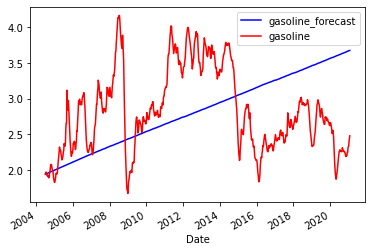

In [22]:
fig, axes = plt.subplots()
df_final["gasoline_forecast"].plot(ax = axes, style = 'b-', legend='gasoline_forecast')
df['gasoline'][-num:].plot(ax = axes, style = 'r-',legend = 'gasoline_actual')

In [23]:
from sklearn.metrics import mean_squared_error
def computeRMSE(target, predicted):
    
    rmse = np.sqrt(mean_squared_error(target,  predicted))
    
    return rmse

In [24]:
rmse_out_sample = computeRMSE(df['gasoline'][-num:], df_final["gasoline_forecast"])
rmse_out_sample

0.7724832505789572

In [25]:
max_range = df['gasoline'].max() - df['gasoline'].min()
max_range

3.064

$\textbf{CO2}$

In [26]:
crude_oil_future_co2 = df[['crude_oil']]
crude_oil_future_co2

,crude_oil
Date,
2000-08-28,32.869999
2000-09-04,32.869999
2000-09-11,35.099998
2000-09-18,36.880001
2000-09-25,31.570000
...,...
2020-12-21,47.740002
2020-12-28,47.619999
2021-01-04,47.619999


In [27]:
co2 = pd.read_csv(root + '/CO2 data.csv',index_col = 'Date', parse_dates = True)
co2

,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
Date,,,,,,
2000-08-28,2000.6544,367.70,5,365.67,351.54,90.35
2000-09-04,2000.6735,367.32,6,364.27,351.16,90.35
2000-09-11,2000.6926,367.33,6,365.16,351.06,90.65
2000-09-18,2000.7117,366.86,7,365.33,351.66,90.36
2000-09-25,2000.7309,366.86,5,364.80,351.50,90.42
...,...,...,...,...,...,...
2020-12-28,2020.9877,415.33,7,413.02,390.19,135.53
2021-01-04,2021.0068,415.38,7,413.61,391.84,135.37
2021-01-11,2021.0260,415.07,5,412.98,390.83,134.86


In [28]:
crudef_co2 = crude_oil_future_co2.join(co2)
crudef_co2

,crude_oil,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
Date,,,,,,,
2000-08-28,32.869999,2000.6544,367.70,5,365.67,351.54,90.35
2000-09-04,32.869999,2000.6735,367.32,6,364.27,351.16,90.35
2000-09-11,35.099998,2000.6926,367.33,6,365.16,351.06,90.65
2000-09-18,36.880001,2000.7117,366.86,7,365.33,351.66,90.36
2000-09-25,31.570000,2000.7309,366.86,5,364.80,351.50,90.42
...,...,...,...,...,...,...,...
2020-12-21,47.740002,2020.9686,414.84,6,412.52,390.46,135.27
2020-12-28,47.619999,2020.9877,415.33,7,413.02,390.19,135.53
2021-01-04,47.619999,2021.0068,415.38,7,413.61,391.84,135.37


In [29]:
crudef_co2 = crudef_co2[crudef_co2['ppm'].between(-600, 2000)]
crudef_co2

,crude_oil,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
Date,,,,,,,
2000-08-28,32.869999,2000.6544,367.70,5,365.67,351.54,90.35
2000-09-04,32.869999,2000.6735,367.32,6,364.27,351.16,90.35
2000-09-11,35.099998,2000.6926,367.33,6,365.16,351.06,90.65
2000-09-18,36.880001,2000.7117,366.86,7,365.33,351.66,90.36
2000-09-25,31.570000,2000.7309,366.86,5,364.80,351.50,90.42
...,...,...,...,...,...,...,...
2020-12-21,47.740002,2020.9686,414.84,6,412.52,390.46,135.27
2020-12-28,47.619999,2020.9877,415.33,7,413.02,390.19,135.53
2021-01-04,47.619999,2021.0068,415.38,7,413.61,391.84,135.37


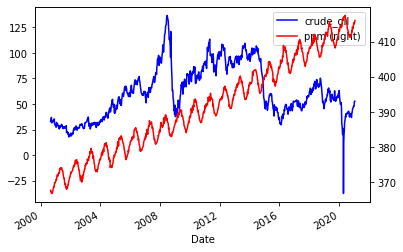

In [30]:
fig, axes = plt.subplots()
crudef_co2["crude_oil"].plot(ax = axes, style = 'b-', legend='crude_oil')
crudef_co2['ppm'].plot(ax = axes, style = 'r-',legend = 'CO2 concentration', secondary_y = True)

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests
res_co = grangercausalitytests(crudef_co2[['ppm', 'crude_oil']], maxlag=15)
res_co


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4324  , p=0.2317  , df_denom=993, df_num=1
ssr based chi2 test:   chi2=1.4367  , p=0.2307  , df=1
likelihood ratio test: chi2=1.4357  , p=0.2308  , df=1
parameter F test:         F=1.4324  , p=0.2317  , df_denom=993, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8129  , p=0.0605  , df_denom=990, df_num=2
ssr based chi2 test:   chi2=5.6542  , p=0.0592  , df=2
likelihood ratio test: chi2=5.6382  , p=0.0597  , df=2
parameter F test:         F=2.8129  , p=0.0605  , df_denom=990, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1433  , p=0.0932  , df_denom=987, df_num=3
ssr based chi2 test:   chi2=6.4754  , p=0.0906  , df=3
likelihood ratio test: chi2=6.4544  , p=0.0915  , df=3
parameter F test:         F=2.1433  , p=0.0932  , df_denom=987, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1824  , p=0.0691  

{1: ({'ssr_ftest': (1.4323620491406466, 0.23166498737803623, 993.0, 1),
   'ssr_chi2test': (1.4366894269326125, 0.23067581528110606, 1),
   'lrtest': (1.435654239303858, 0.23084387560807781, 1),
   'params_ftest': (1.4323620491368818, 0.23166498737861627, 993.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.812877718203157, 0.06051187427351344, 990.0, 2),
   'ssr_chi2test': (5.654168342650791, 0.059185176149670754, 2),
   'lrtest': (5.638163809896469, 0.05966069175856639, 2),
   'params_ftest': (2.8128777182029063, 0.06051187427352578, 990.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.14325581350102, 0.09319188729783712, 987.0, 3),
   'ssr_chi2test': (6.475368628024358, 0.0906389823132915, 3),
   'lrtest': (6.4543680337055775, 0.09147959221699314, 3),
   'params_ftest': (2.1432558134981172, 0.0931918872981826, 987.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 

In [32]:
gc_test_df = crudef_co2[['ppm', 'crude_oil']]
grangers_causation_matrix(gc_test_df, variables = gc_test_df.columns)

,ppm_x,crude_oil_x
ppm_y,1.0000,0.0592
crude_oil_y,0.4053,1.0000


In [33]:
# Since 0.0592>0.05, it means crude price does not cause ppm; 0.477>0,05, ppm does not cause crude price.
# Thus, NO CORRELATION OR CAUSATION

In [34]:
coin_result_co = ts.coint(crudef_co2['crude_oil'], crudef_co2['ppm']) 
coin_result_co   # 0.218>0.05 cannot reject null hypothesis of no cointegration, confirm

(-2.6494170725715507,
 0.21829616877445568,
 array([-3.90746968, -3.34227152, -3.04871097]))